## Titanic Survival Prediction

## Problem Statement

In the aftermath of the Titanic incident, where the ship tragically sank after colliding with an iceberg, our objective is to develop a predictive model for passenger survival. Leveraging various features such as demographic information, ticket class, and boarding location, our aim is to create a model that can estimate the likelihood of a passenger surviving the disaster. By analyzing and understanding the patterns within the dataset, we seek to contribute to the broader understanding of factors influencing passenger outcomes during this historic maritime event.

## Importing Relevant Libraries

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Load the data

In [424]:

data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [425]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [426]:
data.shape

(891, 12)

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [428]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin have null values

# Data Cleaning

## Handling missing values

In [429]:
df = data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [430]:
#Replace missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [431]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [432]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [433]:
#Replace with mode
df['Embarked'].fillna('S',inplace=True)

In [434]:
#drop the cabin column coz it has alot of missing values
df.drop('Cabin', axis=1, inplace=True)

In [435]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [436]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA

## Data Analysis

survival variable is represented as:
0 : No
1:Yes

In [437]:
#statistical measures of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [438]:
#Finding number of people survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data visualization

<Axes: xlabel='Survived', ylabel='count'>

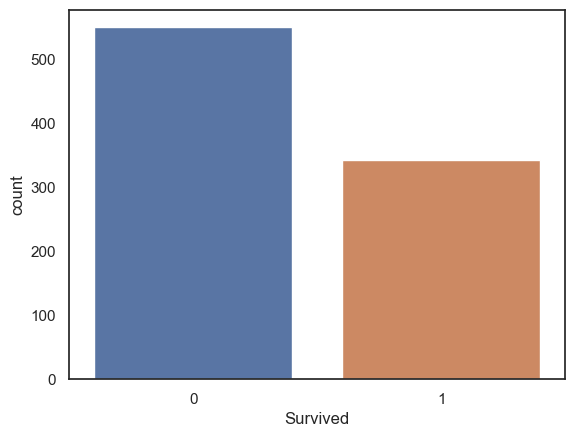

In [439]:
#Countplot for survived column
sns.countplot(x = 'Survived',data=data)

In [440]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

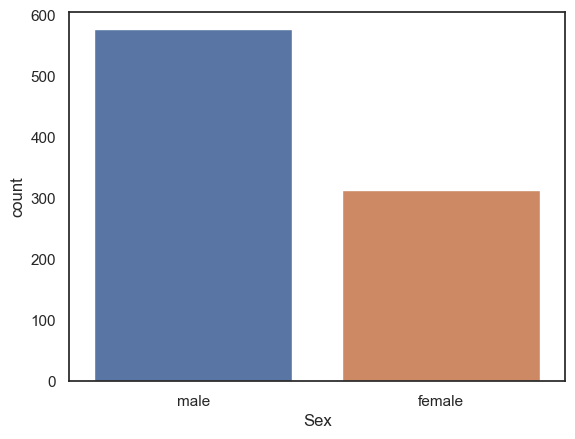

In [441]:
#Countplot for sex column
sns.countplot(x = 'Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

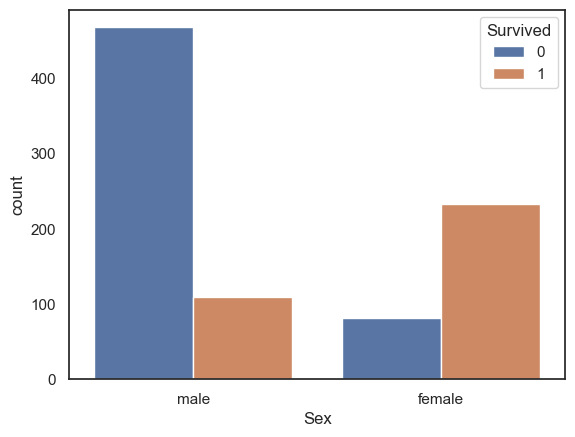

In [442]:
#Number of survivors gender wise
sns.countplot(x='Sex', hue='Survived', data=df)

From the visualization More Females survived

<Axes: xlabel='Pclass', ylabel='count'>

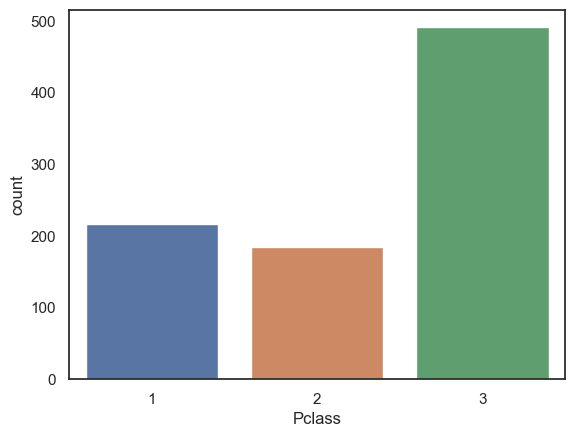

In [443]:
# Making a countplot for 'Pclass' column
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

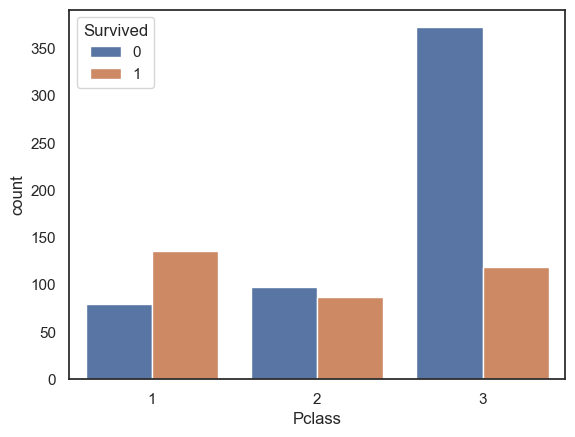

In [444]:
#Number of survivors Pclass wise
sns.countplot(x='Pclass', hue='Survived', data=df)

 The number of passenger who survived most are 1st class

<Axes: xlabel='SibSp', ylabel='count'>

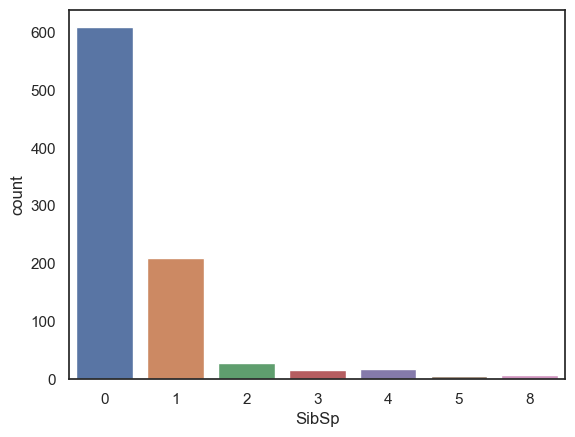

In [445]:
# Making a countplot for 'SibSp' column
sns.countplot(x='SibSp', data=df)

<Axes: xlabel='SibSp', ylabel='count'>

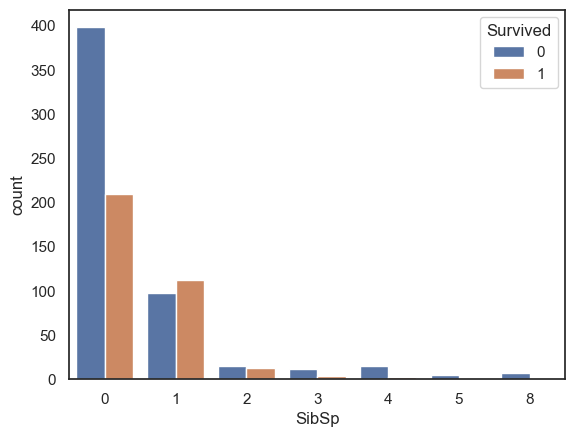

In [446]:
#Number of survivors SibSp wise
sns.countplot(x='SibSp', hue='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

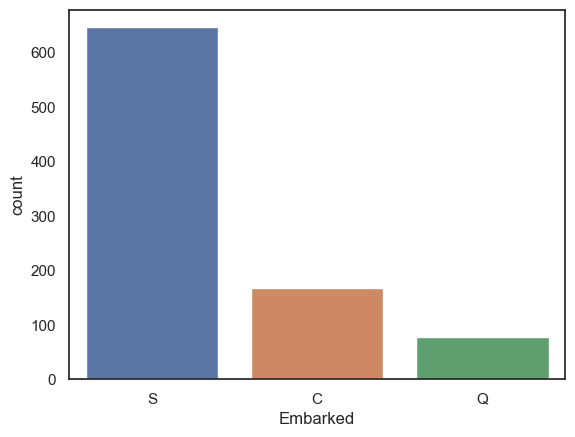

In [447]:
# Making a countplot for 'Embarked' column
sns.countplot(x='Embarked', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

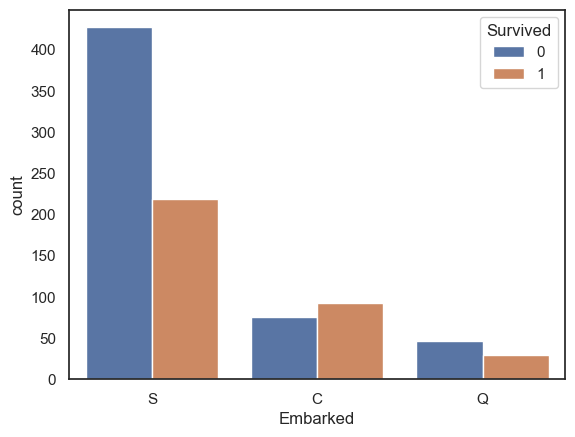

In [448]:
#Number of survivors Embarked wise
sns.countplot(x='Embarked', hue='Survived', data=df)

## Encoding categorical columns

In [449]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [450]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [451]:
# Converting categorical columns to numerical
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [452]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [453]:
df.shape

(891, 11)

## Perform Train Test split

In [454]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [455]:
#Define X and y
X = df.drop(columns=['PassengerId','Survived','Name','Ticket'],axis = 1)
y = df['Survived']


In [456]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [457]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting Data

In [458]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [459]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


## Model Training

## Logistic Regression

In [460]:

# Initialize the Logistic Regression model
model1 = LogisticRegression()

# Train the model on the training data
model1.fit(X_train, y_train)


c:\Users\Faith\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

In [461]:

# Predictions on the test set
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.7988826815642458
Confusion Matrix:
[[89 16]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### The models perfoms well it has an accuracy score of 80% and it predicts the 'not Survived' class(0) well and also not so bad on predicting the Survived(1).The 'not survived' class has a precision of 80%,recall of 84%, f1-score of 82% . While on the 'survived' class it predicts with a precision of 75% , recall 70% and an f1-score of 73%. 

### We can also try another model to see if it improves further.

## KNN Model

In [462]:
# Fit a KNN model
knn_model = KNeighborsClassifier()
# Fit the model on the scaled training data
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

## Model Evaluation

In [463]:

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for KNN Model:", accuracy_knn)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN Model:")
print(conf_matrix_knn)

# Classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report for KNN Model:")
print(class_report_knn)


Accuracy for KNN Model: 0.7039106145251397
Confusion Matrix for KNN Model:
[[86 19]
 [34 40]]
Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.68      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



### The logistic regression performs way better than the KNN model. we can work with the Logistic Regression model

## Model Validation

In [464]:
# Assuming you have the evaluation metrics for the KNN model and another model
accuracy_knn = 0.7039106145251397
conf_matrix_knn = [[86, 19], [34, 40]]
class_report_knn = """
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.68      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179
"""

accuracy_another_model = 0.7988826815642458
conf_matrix_another_model = [[89, 16], [20, 54]]
class_report_another_model = """
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179
"""

# Print or use the validation metrics for both models
print("Validation Metrics for KNN Model:")
print("Accuracy:", accuracy_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)

print("\nValidation Metrics for Logistic Model:")
print("Accuracy:", accuracy_another_model)
print("Confusion Matrix:")
print(conf_matrix_another_model)
print("Classification Report:")
print(class_report_another_model)


Validation Metrics for KNN Model:
Accuracy: 0.7039106145251397
Confusion Matrix:
[[86, 19], [34, 40]]
Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       105
           1       0.68      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179


Validation Metrics for Logistic Model:
Accuracy: 0.7988826815642458
Confusion Matrix:
[[89, 16], [20, 54]]
Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Conclusion

Model Performance:

The K-Nearest Neighbors (KNN) model achieved an accuracy of approximately 70.39% on the test set, while the Logistic Regression model performed better with an accuracy of around 79.89%.

Confusion Matrix Analysis:

For the KNN model, there were 86 true positives (TP), 40 true negatives (TN), 19 false positives (FP), and 34 false negatives (FN).
The Logistic Regression model exhibited 89 true positives (TP), 54 true negatives (TN), 16 false positives (FP), and 20 false negatives (FN).

Classification Report Insights:

Precision, recall, and F1-score metrics provide additional insights into model performance for each class.
For the KNN model, precision for class 0 is 0.72, recall is 0.82, and F1-score is 0.76.
For the Logistic Regression model, precision for class 0 is 0.82, recall is 0.85, and F1-score is 0.83.

## Recommendations

Hyperparameter Tuning:

Explore hyperparameter tuning for both models to potentially enhance their performance. This can be done using techniques like grid search.

Further Analysis:

Conduct further analysis to understand the patterns and characteristics of misclassifications, particularly false positives and false negatives, and adjust the models accordingly.